## Ques: 5

Due to your immense help, your friend startup successfully got seed funding and it is on the operational mode. Now your friend wants to expand his startup and he is looking for new investors for his startup. Now you again come as a saviour to help your friend and want to create a list of probable new new investors. Before moving forward you remember your investor friend advice that finding the investors by analysing the investment type. Since your friend startup is not in early phase it is in growth stage so the best-suited investment type is Private Equity. Find the top 5 investors who have invested in a different number of startups and their investment type is Private Equity. Correct spelling of investment types are - "Private Equity", "Seed Funding", "Debt Funding", and "Crowd Funding". Keep an eye for any spelling mistake. You can find this by printing unique values from this column.There are many errors in startup names. Ignore correcting all, just handle the important ones - Ola, Flipkart, Oyo and Paytm.

Sequoia Capital 45
Accel Partners 43
Kalaari Capital 35
Blume Ventures 27
SAIF Partners 24


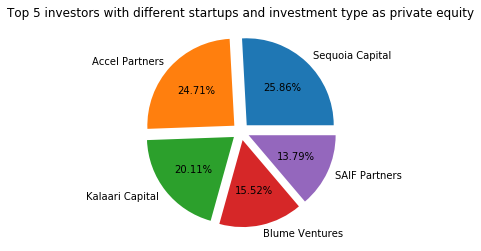

In [7]:
# problem 5:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data=pd.read_csv("Datasets/startup_funding.csv",encoding="utf-8")
df=data.copy()

# investors
df.dropna(subset=["InvestorsName"],inplace=True)
df=df[df.InvestorsName!="Undisclosed Investors"]
df=df[df.InvestorsName!="Undisclosed investors"]
df=df[df.InvestorsName!="Undisclosed Investor"]
df=df[df.InvestorsName!="Undisclosed investor"]
df=df[df.InvestorsName!="undisclosed investors"]
df=df[df.InvestorsName!="Undisclosed"]
def func1(name):
    return name.split(",")
df.InvestorsName=df.InvestorsName.apply(func1)

# startup names correction
df.dropna(subset=["StartupName"],inplace=True)
df.StartupName.replace("Ola Cabs","Ola",inplace=True)
df.StartupName.replace("Olacabs","Ola",inplace=True)
df.StartupName.replace("olacabs","Ola",inplace=True)
df.StartupName.replace("ola","Ola",inplace=True)
df.StartupName.replace("Flipkart.com","Flipkart",inplace=True)
df.StartupName.replace("Oyorooms","Oyo",inplace=True)
df.StartupName.replace("OYO Rooms","Oyo",inplace=True)
df.StartupName.replace("OyoRooms","Oyo",inplace=True)
df.StartupName.replace("Oyo Rooms","Oyo",inplace=True)
df.StartupName.replace("Paytm Marketplace","Paytm",inplace=True)

# investment type correction
df.dropna(subset=["InvestmentType"],inplace=True)
df.InvestmentType.replace("SeedFunding","Seed Funding",inplace=True)
df.InvestmentType.replace("PrivateEquity","Private Equity",inplace=True)
df.InvestmentType.replace("Crowd funding","Crowd Funding",inplace=True)

df=df[(df.InvestmentType=="Private Equity")] # getting only rows with investment type as Private equity

inv=np.array(df.InvestorsName)
stname=np.array(df.StartupName)
check={}
i_a={}

for i in range(len(inv)):
    for j in range(len(inv[i])):
        element=inv[i][j].strip() # using strip to get rid of spaces
        if element!="":
            if not((stname[i]+element) in check.keys()): # checking if the startup name & investor name pair is already present in the dictionary or not
                i_a[element]=i_a.get(element,0)+1
                check[stname[i]+element]=1
                
d=pd.DataFrame(list(i_a.values()),list(i_a.keys()))
d=d.sort_values(by=[0],ascending=False)
for i in range(5):
    print(d.index[i],d[0][i])
count=np.array(d[0:5].values).ravel()
inv_name=np.array(d[0:5].index).ravel()
e=[0.1,0.1,0.1,0.1,0.1]
plt.pie(count,labels=inv_name,autopct="%.2f%%",explode=e)
plt.title("Top 5 investors with different startups and investment type as private equity")
plt.show()